In [1]:
import pandas as pd
df=pd.read_excel("C:\\Users\\SAI REVANTH\\Downloads\\Lab4.xlsx")
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from math import log2



y = df['buys_computer']
X = df.drop('buys_computer', axis=1)


categorical_columns = ['age', 'income', 'student', 'credit_rating']


preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)


model = DecisionTreeClassifier()


pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X, y)


tree_depth = model.get_depth()

print(f"The depth of the Decision Tree is: {tree_depth}")

def entropy(df):
    total_count = len(df)
    if total_count == 0:
        return 0
    counts = df.value_counts()
    entropy = -sum((count / total_count) * log2(count / total_count) for count in counts)
    return entropy


def information_gain(df, attribute):
   
    root_entropy = entropy(df['buys_computer'])

    attribute_values = df[attribute].unique()
    weighted_entropy = 0

    for value in attribute_values:
        subset = df[df[attribute] == value]
        subset_entropy = entropy(subset['buys_computer'])
        weight = len(subset) / len(df)
        weighted_entropy += weight * subset_entropy

    
    information_gain_value = root_entropy - weighted_entropy
    return information_gain_value


attributes = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for attribute in attributes:
    gain = information_gain(df, attribute)
    information_gains[attribute] = gain

best_attribute = max(information_gains, key=information_gains.get)

print("\nInformation Gains:")
for attribute, gain in information_gains.items():
    print(f"{attribute}: {gain}")

print(f"\nThe first feature for constructing the decision tree: {best_attribute}")


The depth of the Decision Tree is: 4

Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949

The first feature for constructing the decision tree: age


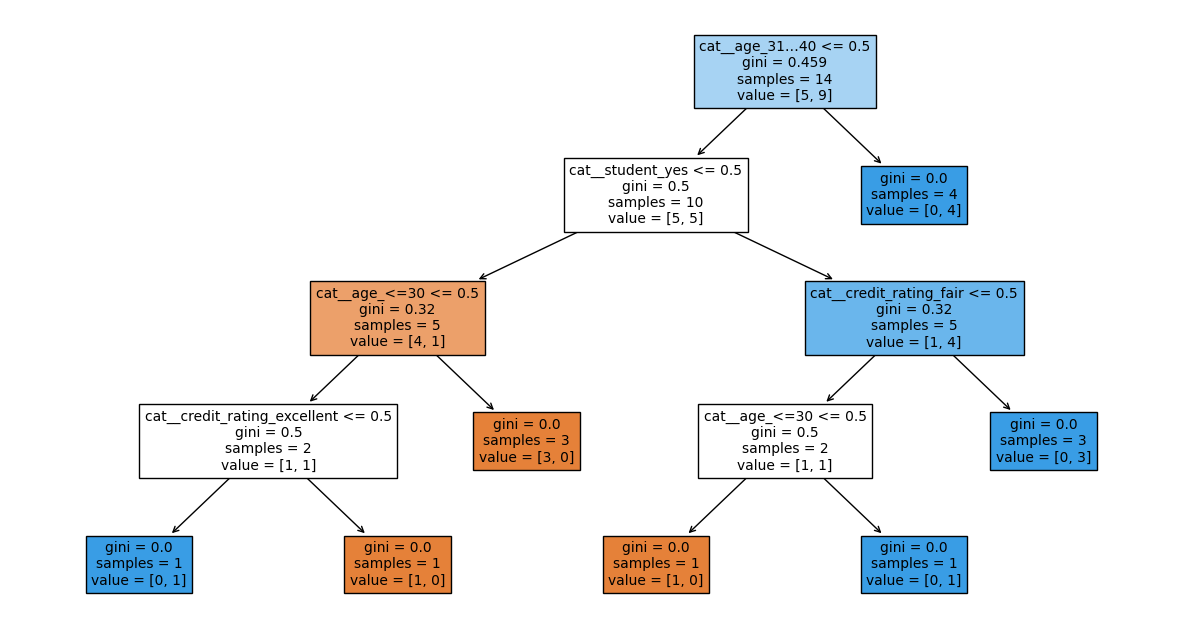

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X, y)


plt.figure(figsize=(15, 8))  
plot_tree(model, filled=True, feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(input_features=categorical_columns))
plt.show()

In [1]:
import numpy as np

activation_maps = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_pixel.npy")
labels = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_labelpixel.npy")
activation_maps.shape,labels.shape
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


print(activation_maps.shape,labels.shape)

num_samples = activation_maps.shape[0]   
num_features = activation_maps.shape[1]  

X_reshaped = activation_maps.reshape(num_samples, num_features)
y_reshaped = labels.reshape(num_samples)  
print(X_reshaped.shape,y_reshaped.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

(16384, 13) (16384, 1)
(16384, 13) (16384,)


In [2]:

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.3, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.44894222945484136


In [9]:
#for test set
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the data
activation_maps = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_pixel.npy")
labels = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_labelpixel.npy")

num_samples = activation_maps.shape[0]  
num_features = activation_maps.shape[1]  

X_reshaped = activation_maps.reshape(num_samples, num_features)
y_reshaped = labels.reshape(num_samples)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.3, random_state=42)

# K-Nearest Neighbors Classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Classifier Accuracy:", accuracy_knn)

# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Classifier Accuracy:", accuracy_tree)


K-Nearest Neighbors Classifier Accuracy: 0.44894222945484136
Decision Tree Classifier Accuracy: 0.47477624084621645


In [4]:
#A4 Based on the project from here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
training_accuracy = model.score(X_train, y_train)
print("Training Set Accuracy:", training_accuracy)
test_accuracy = model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

'''# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=None, class_names=None)
plt.show()
'''

Training Set Accuracy: 0.660882455528427
Test Set Accuracy: 0.47620016273393


'# Plot the Decision Tree\nplt.figure(figsize=(15, 10))\nplot_tree(model, filled=True, feature_names=None, class_names=None)\nplt.show()\n'

In [5]:
#A5
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
training_accuracy = model.score(X_train, y_train)
print("Training Set Accuracy:", training_accuracy)
test_accuracy = model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

'''# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=None, class_names=None)
plt.show()
'''

Training Set Accuracy: 0.5551098709452389
Test Set Accuracy: 0.5587876322213181


'# Plot the Decision Tree with max_depth constraint\nplt.figure(figsize=(15, 10))\nplot_tree(model, filled=True, feature_names=None, class_names=None)\nplt.show()\n'

In [6]:
#A6
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(X_train, y_train)
training_accuracy_entropy = model_entropy.score(X_train, y_train)
print("Training Set Accuracy (Entropy Criterion):", training_accuracy_entropy)
test_accuracy_entropy = model_entropy.score(X_test, y_test)
print("Test Set Accuracy (Entropy Criterion):", test_accuracy_entropy)
'''
plt.figure(figsize=(15, 10))
plot_tree(model_entropy, filled=True, feature_names=None, class_names=None)
plt.show()
'''

Training Set Accuracy (Entropy Criterion): 0.660882455528427
Test Set Accuracy (Entropy Criterion): 0.4772172497965826


'\nplt.figure(figsize=(15, 10))\nplot_tree(model_entropy, filled=True, feature_names=None, class_names=None)\nplt.show()\n'

In [7]:
#A7
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Test Set Accuracy:", accuracy_decision_tree)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)


y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Test Set Accuracy:", accuracy_random_forest)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))


Decision Tree Test Set Accuracy: 0.4770138323840521
Random Forest Test Set Accuracy: 0.5046786004882018

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.19      0.23      1392
           1       0.02      0.01      0.01       180
         128       0.15      0.06      0.09       594
         255       0.55      0.74      0.63      2750

    accuracy                           0.48      4916
   macro avg       0.25      0.25      0.24      4916
weighted avg       0.41      0.48      0.43      4916


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.13      0.18      1392
           1       0.00      0.00      0.00       180
         128       0.13      0.03      0.05       594
         255       0.56      0.83      0.67      2750

    accuracy                           0.50      4916
   macro avg       0.24      0.25      0.22      4916
weigh

In [14]:
#A8
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

activation_maps = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_pixel.npy")
labels = np.load("C:\\Users\\SAI REVANTH\\Downloads\\activation_maps_lines_image52_labelpixel.npy")

X_train, X_test, y_train, y_test = train_test_split(activation_maps, labels, test_size=0.3, random_state=42)

# Convert y_train to a 1D array
y_train = y_train.ravel()

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

feature_importances = rf_classifier.feature_importances_

print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.660882455528427
Testing Accuracy: 0.5046786004882018
Feature Importances:
Feature 1: 0.2948367189698739
Feature 2: 0.1781660277767714
Feature 3: 0.1770573158887571
Feature 4: 0.0932241519479508
Feature 5: 0.07717315825593385
Feature 6: 0.02927634218959806
Feature 7: 0.024895069334837882
Feature 8: 0.032978636167411965
Feature 9: 0.009086854813989994
Feature 10: 0.0
Feature 11: 0.05433340309420374
Feature 12: 0.02227454449747675
Feature 13: 0.006697777063194508

Training Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.38      0.50      3212
           1       0.86      0.18      0.30       464
         128       0.69      0.23      0.34      1454
         255       0.65      0.94      0.77      6338

    accuracy                           0.66     11468
   macro avg       0.73      0.43      0.48     11468
weighted avg       0.68      0.66      0.62     11468


Testing Classification Report:
              